# Proyek Pertama : Membuat Model NLP dengan TensorFlow
Nama Lengkap : Muhammad Fadhil Abyansyah

Username : fadhil-abyansyah

Email : infofadhil29@gmail.com


---


Mengimpor library pandas

In [219]:
import pandas as pd

Membaca file CSV menggunakan pandas

In [220]:
df = pd.read_csv('news.csv')

Menampilkan 5 baris pertama data

In [221]:
df.head()

,Unnamed: 0,news_headline,news_article,news_category
0,0,50-year-old problem of biology solved by Artif...,DeepMind's AI system 'AlphaFold' has been reco...,technology
1,1,Microsoft Teams to stop working on Internet Ex...,Microsoft Teams will stop working on Internet ...,technology
2,2,Hope US won't erect barriers to cooperation: C...,"China, in response to reports of US adding Chi...",technology
3,3,Global smartphone sales in Q3 falls 5.7% to 36...,The global smartphone sales in the third quart...,technology
4,4,EU hoping Biden will clarify US position on di...,The European Union (EU) is hoping that US Pres...,technology


Mengubah nama kolom

In [222]:
df.rename(columns={'Unnamed: 0': 'id','news_headline': 'headline','news_article': 'article','news_category':'category'}, inplace=True)

Menampilkan 5 baris pertama data

In [223]:
df.head()

,id,headline,article,category
0,0,50-year-old problem of biology solved by Artif...,DeepMind's AI system 'AlphaFold' has been reco...,technology
1,1,Microsoft Teams to stop working on Internet Ex...,Microsoft Teams will stop working on Internet ...,technology
2,2,Hope US won't erect barriers to cooperation: C...,"China, in response to reports of US adding Chi...",technology
3,3,Global smartphone sales in Q3 falls 5.7% to 36...,The global smartphone sales in the third quart...,technology
4,4,EU hoping Biden will clarify US position on di...,The European Union (EU) is hoping that US Pres...,technology


Menampilkan jumlah kolom dan baris

In [224]:
df.shape

(4817, 4)

Mengonversi kategori berita menjadi one-hot encoding

In [225]:
categories = pd.get_dummies(df.category)
df_baru = pd.concat([df, categories], axis=1)
df_baru = df_baru.drop(columns='category')
df_baru

,id,headline,article,automobile,entertainment,politics,science,sports,technology,world
0,0,50-year-old problem of biology solved by Artif...,DeepMind's AI system 'AlphaFold' has been reco...,0,0,0,0,0,1,0
1,1,Microsoft Teams to stop working on Internet Ex...,Microsoft Teams will stop working on Internet ...,0,0,0,0,0,1,0
2,2,Hope US won't erect barriers to cooperation: C...,"China, in response to reports of US adding Chi...",0,0,0,0,0,1,0
3,3,Global smartphone sales in Q3 falls 5.7% to 36...,The global smartphone sales in the third quart...,0,0,0,0,0,1,0
4,4,EU hoping Biden will clarify US position on di...,The European Union (EU) is hoping that US Pres...,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
4812,4812,AstraZeneca to test combining Oxford vaccine w...,"AstraZeneca, which is developing a coronavirus...",0,0,0,1,0,0,0
4813,4813,"Humanity will face 60°C temperatures in 2050s,...",As many as two billion people will face 60°C t...,0,0,0,1,0,0,0
4814,4814,Human-made objects to outweigh living things b...,Scientists have said that the weight of human-...,0,0,0,1,0,0,0
4815,4815,"IUCN lists 31 species as 'Extinct', European B...",The IUCN released an update of its Red List of...,0,0,0,1,0,0,0


Menghapus kolom yang tidak diperlukan

In [226]:
df = df.drop(['id', 'headline'], axis=1)

Menampilkan 5 baris pertama data

In [227]:
df.head()

,article,category
0,DeepMind's AI system 'AlphaFold' has been reco...,technology
1,Microsoft Teams will stop working on Internet ...,technology
2,"China, in response to reports of US adding Chi...",technology
3,The global smartphone sales in the third quart...,technology
4,The European Union (EU) is hoping that US Pres...,technology


Memisahkan artikel dan label

In [228]:
articles = df_baru['article'].values
label = df_baru[['automobile', 'entertainment', 'politics', 'science', 'sports','technology','world' ]].values

Memisahkan data latih dan data uji

In [229]:
from sklearn.model_selection import train_test_split
articles_latih, articles_test, label_latih, label_test = train_test_split(articles, label, test_size = 0.2 )

Tokenisasi teks menggunakan TensorFlow

In [230]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(articles_latih)
tokenizer.fit_on_texts(articles_test)

sekuens_latih = tokenizer.texts_to_sequences(articles_latih)
sekuens_test = tokenizer.texts_to_sequences(articles_test)

padded_latih = pad_sequences(sekuens_latih)
padded_test = pad_sequences(sekuens_test)

Mengimpor TensorFlow

In [231]:
import tensorflow as tf

Membangun model menggunakan TensorFlow

In [232]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim = 5000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')
])

Mengompilasi model

In [233]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, None, 16)          80000     
                                                                 
 lstm_11 (LSTM)              (None, 64)                20736     
                                                                 
 dense_33 (Dense)            (None, 128)               8320      
                                                                 
 dense_34 (Dense)            (None, 64)                8256      
                                                                 
 dense_35 (Dense)            (None, 7)                 455       
                                                                 
Total params: 117767 (460.03 KB)
Trainable params: 117767 (460.03 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Mendefinisikan callback untuk menghentikan training saat akurasi mencapai 90%

In [234]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy') > 0.90):
      print('\nAkurasi telah mencapai 90%')
      self.model.stop_training = True

callbacks = myCallback()

Melatih model

In [235]:
num_epochs = 30

history = model.fit(
    padded_latih,
    label_latih,
    epochs=num_epochs,
    validation_data=(padded_test, label_test),
    verbose=2,
    callbacks=[callbacks])

Epoch 1/30
121/121 - 5s - loss: 1.7243 - accuracy: 0.2678 - val_loss: 1.2840 - val_accuracy: 0.4834 - 5s/epoch - 41ms/step
Epoch 2/30
121/121 - 3s - loss: 1.0525 - accuracy: 0.5401 - val_loss: 0.9214 - val_accuracy: 0.6369 - 3s/epoch - 27ms/step
Epoch 3/30
121/121 - 3s - loss: 0.6653 - accuracy: 0.7420 - val_loss: 0.7269 - val_accuracy: 0.7386 - 3s/epoch - 24ms/step
Epoch 4/30
121/121 - 3s - loss: 0.4103 - accuracy: 0.8645 - val_loss: 0.4938 - val_accuracy: 0.8454 - 3s/epoch - 24ms/step
Epoch 5/30
121/121 - 3s - loss: 0.2683 - accuracy: 0.9180 - val_loss: 0.5255 - val_accuracy: 0.8382 - 3s/epoch - 23ms/step
Epoch 6/30
121/121 - 3s - loss: 0.2149 - accuracy: 0.9364 - val_loss: 0.4055 - val_accuracy: 0.8911 - 3s/epoch - 27ms/step
Epoch 7/30

Akurasi telah mencapai 90%
121/121 - 3s - loss: 0.1662 - accuracy: 0.9525 - val_loss: 0.3554 - val_accuracy: 0.9025 - 3s/epoch - 24ms/step


Mengimpor Matplotlib

In [236]:
import matplotlib.pyplot as plt

Menampilkan grafik akurasi

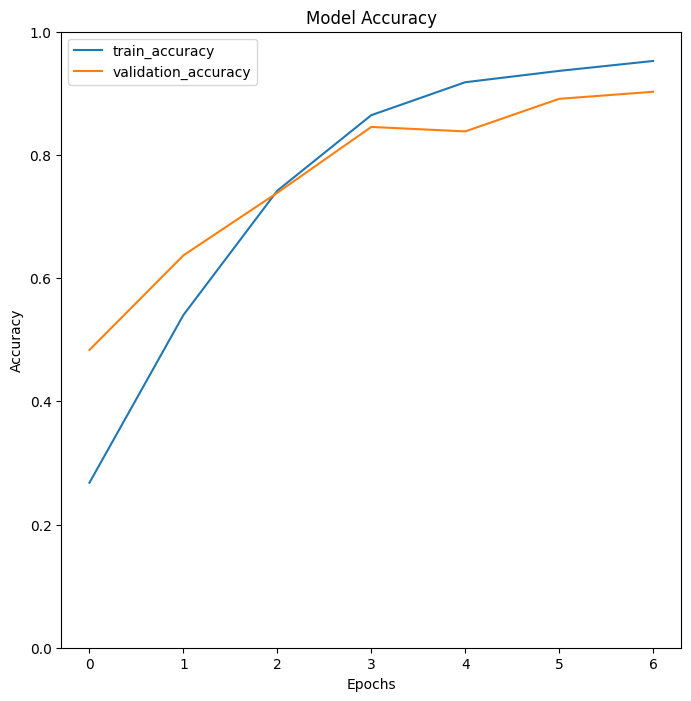

In [237]:
plt.figure(figsize=(8,8))
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='validation_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.ylim(ymin=0, ymax=1)
plt.show()

Menampilkan grafik loss

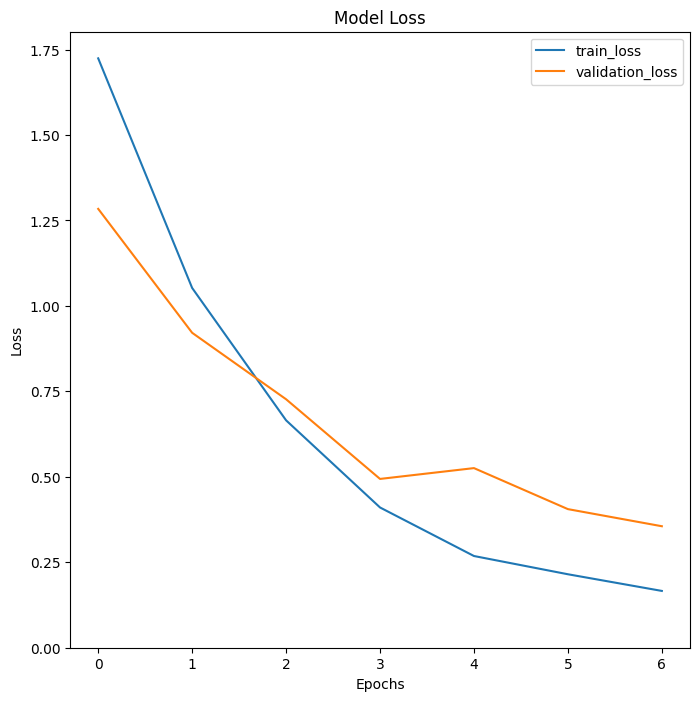

In [238]:
plt.figure(figsize=(8,8))
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='validation_loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.ylim(ymin=0)
plt.show()